# HW1, CHEE 6397 (Data-Driven Materials Modeling)

#### **Topics**: Linear models for regression & classification

#### **Due**: September 26, 2023


## Instructions

- Submit on Canvas. The file you submit should be named as `hw1-<FirstName>_<LastName>-<UHID>.ipynb`, e.g. `hw1-Mingjian_Wen-00001111.ipynb`.
- Input your answer to each question in/below the `Answer` cell. Feel free add to more cells as needed.

### Markdown and Math

- You can use `markdown` cell to type the text part of your answers to a question. And math equations can be typed using LaTex.
- See https://gtribello.github.io/mathNET/assets/notebook-writing.html for a quick intro to markdown in Jupyter and how to write math equations.
- See https://ia.wikipedia.org/wiki/Wikipedia:LaTeX_symbols for a list of LaTex symbols.
- If you are more used to MS Word equation typesetting, you can find a graphical LaTex equations generator at: https://latexeditor.lagrida.com

### Code

- Your Python code to a question can be written using the `code` cell.
- Make sure all used packages are imported properly. For example, before submission, do `Kernel->Restart and Run All Cells...` from the menu bar to double check. If we cannot run your notebook, we won't be able to grade it.


## Scores

Problem 1

- a [10 points]:
- b [10 points]:

Problem 2

- a [5 points]:
- b [10 points]:
- c [5 points]:

Problem 3

- a [5 points]:
- b [15 points]:
- c [10 points]:

Problem 4

- a [5 points]:
- b [15 points]:
- c [10 points]:

Total: 


---
---


## Problem 1


### (a)

For `ridge regression` with a loss function $$L = \| \boldsymbol X \boldsymbol w - \boldsymbol t \|^2 + \lambda \boldsymbol w^T\boldsymbol w ,$$
show that the solution to the least squares minimization problem is $$\boldsymbol {\hat w} = (\lambda\boldsymbol I + \boldsymbol X^T \boldsymbol X)^{-1} X^{T} \boldsymbol t,$$ where $\lambda$ is the regularization constant, and $\boldsymbol I$ is the identity.


### Answer

$$ L = \| \boldsymbol X \boldsymbol w - \boldsymbol t \|^2 + \lambda \boldsymbol w^T\boldsymbol w $$

$$ L = [(\boldsymbol X \boldsymbol w - \boldsymbol t)^T(\boldsymbol X \boldsymbol w - \boldsymbol t)] + \lambda \boldsymbol w^T \boldsymbol w $$ 

$$ \frac{\partial L}{\partial\boldsymbol w} = \frac{\partial [(\boldsymbol X \boldsymbol w - \boldsymbol t)^T(\boldsymbol X \boldsymbol w - \boldsymbol t)]}{\partial (\boldsymbol X \boldsymbol w - t)}\frac{\partial (\boldsymbol X \boldsymbol w - \boldsymbol t)}{\partial\boldsymbol w} + \lambda \frac{\partial}{\partial \boldsymbol w}(\boldsymbol w^T \boldsymbol w)$$

$$ \frac{\partial L}{\partial\boldsymbol w} = 2(\boldsymbol X \boldsymbol w - \boldsymbol t)^T \boldsymbol X + 2\lambda \boldsymbol w^T $$

$$ \frac{\partial L}{\partial\boldsymbol w} = 2\boldsymbol w^T \boldsymbol X^T \boldsymbol X - 2\boldsymbol t^T \boldsymbol X + 2\lambda \boldsymbol w^T $$

$$ \frac{\partial L}{\partial\boldsymbol w} = 2\boldsymbol w^T(\lambda + \boldsymbol X^T \boldsymbol X) - 2\boldsymbol t^T \boldsymbol X $$
$$ \frac{\partial L}{\partial\boldsymbol w} = 2\boldsymbol w^T(\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X) - 2\boldsymbol t^T \boldsymbol X $$

$$ Let ~~~ \frac{\partial L}{\partial \boldsymbol w} = 0 $$
$$ \boldsymbol w^T (\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X) = \boldsymbol t^T \boldsymbol X $$
$$ \boldsymbol w^T = \boldsymbol t^T \boldsymbol X (\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X)^{-1} $$
$$ \boldsymbol w =  [\boldsymbol t^T \boldsymbol X (\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X)^{-1}]^T $$
$$ \boldsymbol w = [(\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X)^{-1}]^T \boldsymbol X^T \boldsymbol t $$ 
$$ \boldsymbol w = [(\lambda \boldsymbol I)^T + (\boldsymbol X^T \boldsymbol X)^T]^{-1} \boldsymbol X^T \boldsymbol t $$
$$ \therefore \boldsymbol {\hat w} = (\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T \boldsymbol t $$ 

### (b)

For regular linear regression, the Gauss–Markov theorem states that the solution (see lecture notes) is guaranteed to be a minimum if $\boldsymbol X^T\boldsymbol X > 0$, i.e. it is positive definite. What is the condition to guarantee that $\boldsymbol{\hat w}$ is a minimum for `ridge regression`? Show your derivation.


### Answer


$$ \frac{\partial L^2}{\partial ^2 \boldsymbol w} = 2(\lambda \boldsymbol I + \boldsymbol X^T \boldsymbol X) $$

If $\frac{\partial L^2}{\partial ^2 \boldsymbol w} > 0$, $\frac{\partial L}{\partial \boldsymbol w}$ will only have one extrema at $\boldsymbol {\hat w} $.
 
Since $\lambda \geq 0$, $\frac{\partial L^2}{\partial ^2 \boldsymbol w} > 0$ if $\boldsymbol X^T \boldsymbol X > 0$.

As a result, if $\boldsymbol X^T \boldsymbol X > 0$, **ridge regression** is guaranteed to have a minimum at $\boldsymbol {\hat w}$.

---


## Problem 2

This problem is about linear regression. We are going to work on dataset of the elastic properties (such as bulk modulus and shear modulus) of inorganic materials.


### (a)

The dataset is given in the `elastic_properties_dataset.csv` file.

- Load the dataset into a Pandas dataframe and print first 5 rows of the dataframe.
- How many data points/samples/rows are there in the dataset?
- How many columns are there in the dataset? What are their names?


### Answer


In [1]:
import pandas as pd
df = pd.read_csv("elastic_properties_dataset.csv")

* Print the first 5 rows of the dataframe

In [2]:
df.head(5)

,material_id,formula,volume,structure,G_Voigt,G_Reuss,G_VRH,K_Voigt,K_Reuss,K_VRH,poisson_ratio,elastic_tensor
0,mp-10003,Nb4CoSi,194.419802,"{'@module': 'pymatgen.core.structure', '@class...",97.438674,96.844535,97.141604,194.270146,194.267623,194.268884,0.285701,[[ 3.11335146e+02 1.44450926e+02 1.26175581e...
1,mp-10010,Al(CoSi)2,61.987320,"{'@module': 'pymatgen.core.structure', '@class...",98.564362,93.939650,96.252006,177.252050,173.647763,175.449907,0.268105,[[ 3.06933574e+02 8.80263496e+01 1.05695672e...
2,mp-10015,SiOs,25.952539,"{'@module': 'pymatgen.core.structure', '@class...",139.263621,120.962289,130.112955,295.077545,295.077545,295.077545,0.307780,[[569.52912769 157.85174897 157.85140728 0. ...
3,mp-10021,Ga,76.721433,"{'@module': 'pymatgen.core.structure', '@class...",17.997812,12.205989,15.101901,49.235377,49.025963,49.130670,0.360593,[[69.28798775 34.78750152 37.38770853 0. ...
4,mp-10025,SiRu2,160.300999,"{'@module': 'pymatgen.core.structure', '@class...",103.784823,100.110773,101.947798,258.480904,255.055257,256.768081,0.324682,[[349.37677662 186.67131003 176.47591881 0. ...


* Number of data points/samples/rows

In [3]:
len(df)

1181

* Number of columns in the dataset

In [4]:
len(df.columns)

12

* Columns name

In [5]:
df.columns

Index(['material_id', 'formula', 'volume', 'structure', 'G_Voigt', 'G_Reuss',
       'G_VRH', 'K_Voigt', 'K_Reuss', 'K_VRH', 'poisson_ratio',
       'elastic_tensor'],
      dtype='object')

### (b)

- For each of `volume`, the bulk modulus (`K_VRH`) and shear modulus (`G_VRH`), do the below:
- Compute the mean, standard deviation, minimum, maximum, and median values.
- Plot the distribution.


### Answer


* Compute the mean, standard deviation, min, max and median values for volume, K_VRH, G_VRH

In [6]:
# volume
print('volume')
print('mean =', df['volume'].mean())
print('standard deviation =', df['volume'].std())
print('min =', df['volume'].min())
print('max =', df['volume'].max())
print('median =', df['volume'].median())

volume
mean = 207.17709802272532
standard deviation = 192.35574666099436
min = 15.850527066300002
max = 2398.90616431
median = 168.92040392


In [7]:
# K_VRH
print('K_VRH')
print('mean =', df['K_VRH'].mean())
print('standard deviation =', df['K_VRH'].std())
print('min =', df['K_VRH'].min())
print('max =', df['K_VRH'].max())
print('median =', df['K_VRH'].median())

K_VRH
mean = 136.25966079460608
standard deviation = 72.88697762536674
min = 6.47613489793
max = 435.66148729800005
median = 130.382765916


In [8]:
# G_VRH
print('G_VRH')
print('mean =', df['G_VRH'].mean())
print('standard deviation =', df['G_VRH'].std())
print('min =', df['G_VRH'].min())
print('max =', df['G_VRH'].max())
print('median =', df['G_VRH'].median())
print('70th percentile =', df['G_VRH'].quantile(.70))

G_VRH
mean = 67.54314488379951
standard deviation = 44.57940767213471
min = 2.72217516753
max = 522.92122535
median = 59.7351625212
70th percentile = 83.4766837601


* Plot the distribution

Text(0, 0.5, 'frequency')

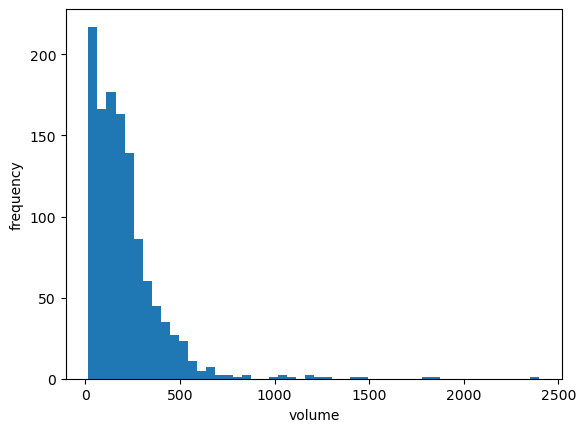

In [23]:
import matplotlib.pyplot as plt

data_type = 'volume'
fig, graph = plt.subplots()
graph.hist(df[data_type], bins = 50)
graph.set_xlabel(data_type)
graph.set_ylabel('frequency')


Text(0, 0.5, 'frequency')

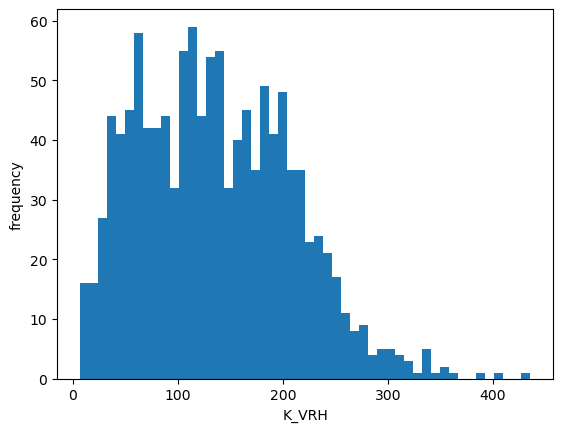

In [24]:
data_type = 'K_VRH'
fig, graph = plt.subplots()
graph.hist(df[data_type], bins = 50)
graph.set_xlabel(data_type)
graph.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

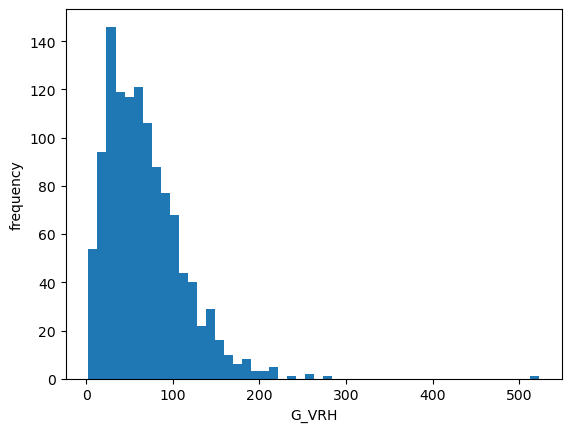

In [25]:
data_type = 'G_VRH'
fig, graph = plt.subplots()
graph.hist(df[data_type], bins = 50)
graph.set_xlabel(data_type)
graph.set_ylabel('frequency')

### (c)

We are interested in fitting a linear regression model to predict the shear modulus `G_VRH` from the `volume` and the bulk modulus `K_VRH`.

- Create a 2D array of features `X` with the first column being the `volume` and the second column being the `K_VRH`.
- Create a 1D array of target `y` with the `G_VRH` column.
- Split the dataset into training and test sets, using 80% of the data for training and 20% for testing. After the split, you should have 4 arrays: `X_train`, `X_test`, `y_train`, `y_test`. You can use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from scikit-learn.


### Answer


* Create a 2D array with featues X containing *volume, K_VRH*

In [26]:
import numpy
X = df[['volume','K_VRH']].to_numpy()
X.shape

(1181, 2)

* Create a 1D target y with *G_VRH*

In [27]:
y = df['G_VRH'].to_numpy()
y.shape

(1181,)

* Split data into test (20%) and training (80%) sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,  random_state=73)
print("Training set:\n\tfeatures: {} \n\ttarget: {}".format(X_train.shape,y_train.shape))
print("Test set:\n\tfeatures: {} \n\ttarget: {}".format(X_test.shape,y_test.shape))

Training set:
	features: (944, 2) 
	target: (944,)
Test set:
	features: (237, 2) 
	target: (237,)


---


## Problem 3

In this problem, we fit linear regression models for the elastic properties dataset.


### (a)

- Fit a linear regression model using [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on our training data `X_train` and `y_train`.
- Evaluate the mean absolute error (MAE) on the test data `X_test` and `y_test`. What is the MAE?


### Answer


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean absolute error is defined as:
$$ MAE = \sum_{i=1}^{n} \frac{| y_i - t_i |}{n} , $$
where $ y_i $ is the prediction of the current model and $ t_i $ is the target.

In [30]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("MAE on test set: ", mae)

MAE on test set:  18.918294922680076


### (b)

In this problem, we implement the linear regression model `MyLinearRegression` from scratch, and below is the partial code. 
- Finish the `fit` function. 
- Use it to fit a linear regression model to `X_train` and `y_train`. And then evaluate the MAE on the test data `X_test` and `y_test`. Are you getting the same MAE as in (c)?

Hints:
- code the normal equation in `fit()` and assign it to `self.w`. You might want to use the numpy functions to perform matrix operations, e.g. `np.matmul()`.
- you might want to use the `add_ones()` helper function to preprocess the input `X` to add a column of ones, which is associated with the intercept $w_0$.


In [31]:
import numpy as np


class MyLinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Train a linear regression model.

        Args:
            X: a 2D array of the features. Each row represent a sample (data point), and
                each column is a feature.
            y: a 1D column vector. Each value is the target corresponding to the data
                point in the same row.
        """
        # apply the linear regression solution to obtain parameters w
        # w = (((X^T)X)^-1)(X^T)*y
        X_padded = self.add_ones(X)
        X_t = X_padded.T
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_t,X_padded)) , X_t),y)


    def predict(self, X):
        """
        Make predictions for new data points.

        Args:
            Z: a 2D array of the features of the new data points, for which predictions
                are performed. Same as `X`, each row represent a data point.
        """
        if self.w is None:
            raise ValueError("Please call the `fit` method to train the model first.")

        X = self.add_ones(X)
        prediction = np.matmul(X, self.w)

        return prediction

    @staticmethod
    def add_ones(X):
        """
        A helper function to prepend a column of ones.

        Args:
            X: a 2D array to which the ones are prepended.

        Example:
            >>> MyLinearRegression.add_ones(
            ...   [[0.1, 0.2],
            ...   [[0.3, 0.4]]
            ... )
            [[1.0, 0.1, 0.2],
             [1.0, 0.3, 0.4]]
        """
        X = np.asarray(X)

        if X.ndim != 2:
            raise ValueError(
                f"Expect a 2D array. But the input data has a dimension of {X.ndim}"
            )

        ones = np.ones(len(X)).reshape(len(X), 1)
        new_X = np.hstack((ones, X))

        return new_X

### Answer


In [32]:
my_model = MyLinearRegression()
my_model.fit(X_train , y_train)
y_pred = my_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("My MAE: ", mae)

My MAE:  18.91829492268007


### (c)

- Compare the results obtained in (a) and (b), are you getting the same MAE? If not, any reason?
- Do you think the linear regression model is a good model for this problem? Why or why not? Hint: compare the MAE with the data statistics in Problem 2.


### Answer


They are equal:

* MAE in (a): $ 18.91829492268 $

* MAE in (b): $ 18.91829492268 $


The MAE is approximately 28% of the mean (67.54), which is quite considerable. Also, about 70% of the data ranges between 2 and 84, making the MAE of 18.92 a significant error percentage. As a result, the model is not a good fit for this problem.

---


## Problem 4


Below is some dataset for a binary classification problem with two features $x_1$ and $x_2$. Answer the following questions based on it.


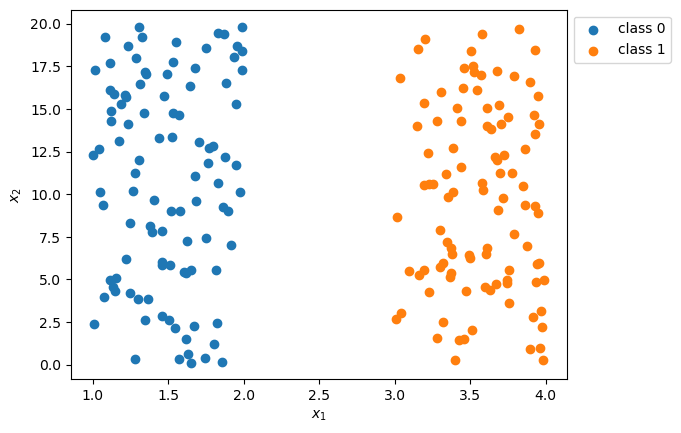

In [33]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(seed: int = 35):
    """Generate a toy dataset for classification.

    Returns:
        X: 2D array of shape (n_samples, 2). Each row is a data point with two features.
        y: 1D array of shape (n_samples,). Each value is the class label (0 or 1) of the
            corresponding data point in X.
    """
    np.random.seed(seed)
    X1_1 = np.random.uniform(1.0, 2.0, 100)
    X1_2 = np.random.uniform(3.0, 4.0, 100)
    X1 = np.concatenate([X1_1, X1_2])
    X2 = np.random.uniform(0.0, 20.0, 200)
    X = np.stack([X1, X2], axis=-1)
    y = np.asarray([0] * 100 + [1] * 100)

    return X, y


def plot_data(X, y, w0=None, w1=None, w2=None):
    """Generate scatter plot for data points, and optionally plot the decision boundary.

    Args:
        X: 2D array of shape (n_samples, 2). Each row is a data point with two features.
        y: 1D array of shape (n_samples,). Each value is the class label (0 or 1) of the
            corresponding data point in X.
        w0, w1, w2: parameters of the decision boundary. If the values are provided, the
            decision boundary will be plotted. If `None`, the decision boundary will not
            be plotted.
    """
    fig, ax = plt.subplots()

    X_class_0 = np.asarray([i for i, j in zip(X, y) if j == 0])
    X_class_1 = np.asarray([i for i, j in zip(X, y) if j == 1])

    ax.scatter(X_class_0[:, 0], X_class_0[:, 1], color="C0", label="class 0")
    ax.scatter(X_class_1[:, 0], X_class_1[:, 1], color="C1", label="class 1")
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")

    if w0 is not None and w1 is not None and w2 is not None:
        X1 = np.asarray([2.0, 3.0])
        X2 = (-w1 * X1 - w0) / w2
        ax.plot(X1, X2, color="C2")
        ax.set_ylim(-1, 21)

    ax.legend(bbox_to_anchor=(1, 1))


X, y = generate_data()

plot_data(X, y)

### (a)

Upon observation, without any data fitting, what would you expect the decision boundary of the binary classification to be?
Hint: for a binary classification with two features $x_1$ and $x_2$, the general decision boundary is given by the equation: $$w_2x_2 + w_1x_1 + w_0 = 0, $$ where $w_2, w_1$ and $w_0$ are some constants.


### Answer

According to the plot, we can observe that class 0 and 1 are entirely separated into two regions. The region with $ x_1 < 2.5$ belongs to class 0 and $ x_1 > 2.5 $ belongs to class 1. Another observation is that $x_2$ seems to have no effect on the distribution of both features.

We can create a boundary $ x_1 = 2.5 $. However, since we cannot ignore the significance of $w_2$ entirely (by set it to 0), we can choose $w_2$ to be very close to 0 to represent its insignificance to the final solution. Let $w_2 = 0.0001$

As a result, the values of $w_0, w_1, w_2$ are: 

$w_0 = -2.5$ ; $w_1 = 1$ ; $w_2 = 0.0001 $

and the decision boundary is: $$ 0.0001x_2 + x_1 - 2.5 = 0 $$


We can verify this boundary by data plot:

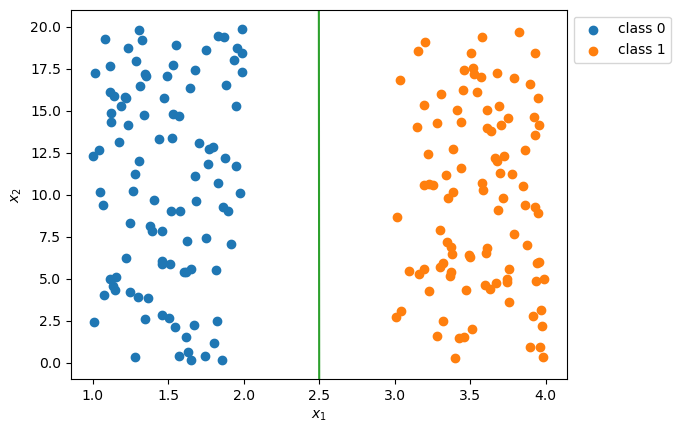

In [34]:
plot_data(X, y, -2.5, 1, 0.0001)

### (b)

Fit a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model for the data using scikit-learn.

- What is the decision boundary obtained from this model? Hint: once you have the LogisticRegression model fitted, you can get access to the values $w_1$ and $w_2$ from the `coef_` attribute, and $w_0$ from the `intercept_` attribute. Read the documentation of scikit-learn LogisticRegression to learn more.
- Plot a figure to show the data points and the decision boundary. Hint: once you have the values of $w_0, w_1$ and $w_2$, you can call the `plot_data` function given above to plot the data and the decision boundary.


### Answer


In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
w = [0]*3
w[1] = model.coef_[0][0]
w[2] = model.coef_[0][1]
w[0] = model.intercept_[0]
for i in range(0,3):
    print('w{}: {}'.format(i,w[i]))

w0: -9.882499388916978
w1: 4.030440601434712
w2: -0.03125933641132473


* Data and decision boundary plot

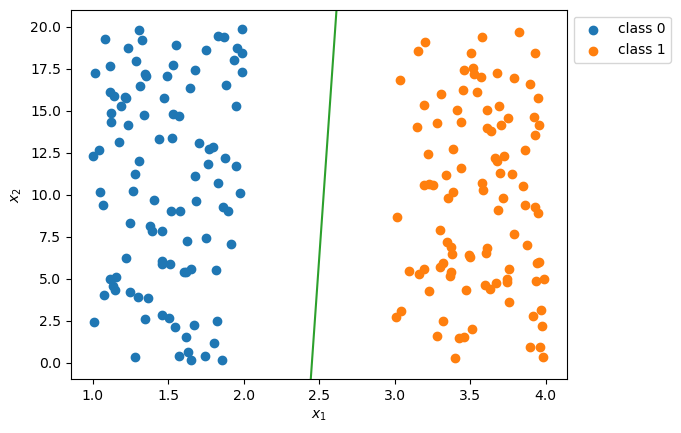

In [36]:
plot_data(X, y, w[0], w[1], w[2])

### (c)

Does the solution obtained in part (b) agree with your expected solution in part (a)? If yes, justify it. If no, why?


### Answer

The decision boundary obtained in part (b):

$$ -0.03126x_2 + 4.0304x_1 -9.8825 = 0 $$

Divide both sides with $w_1$, we get:

$$ -0.0078x_2 + x_1 - 2.4520 = 0 $$

Observed solution from part (a):

$$ 0.0001x_2 + x_1 - 2.5 = 0 $$

We can tell these two equations strongly resemble one another with $w_1 = 1$, $w_0 \approx -2.5 $, and $w_2 \approx 0 $